In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("default of credit card clients.xls")
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [5]:
#unique values in each categorical variable

print('SEX'+ str(sorted(df['SEX'].unique())))
print('EDUCATION'+str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE'+str(sorted(df['MARRIAGE'].unique())))
print('PAY_0'+str(sorted(df['PAY_0'].unique())))
print('default payment next month'+str(sorted(df['default payment next month'].unique())))

SEX[1, 2]
EDUCATION[0, 1, 2, 3, 4, 5, 6]
MARRIAGE[0, 1, 2, 3]
PAY_0[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
default payment next month[0, 1]


In [6]:
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    print(df[i].value_counts())

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64
 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


### Data Cleaning

1. change values of 0,5,6 in education to 4 (others)
2. change values of 0 in marriage to 3(others)
3. change variable name pay0 to pay1
4. change variable name default payment next month to DEFAULT

#### Change Variable Names

In [3]:
df = df.rename(columns={'default payment next month': 'DEFAULT', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


#### Change values of categorical variables

In [4]:
fill_ed = ((df['EDUCATION']==0)|(df['EDUCATION']==5)|(df['EDUCATION']==6))
df.loc[fill_ed, 'EDUCATION'] = 4

df.loc[df['MARRIAGE']==0, 'MARRIAGE'] = 3

In [5]:
print('EDUCATION'+str(sorted(df['EDUCATION'].unique())))
print('MARRIAGE'+str(sorted(df['MARRIAGE'].unique())))

EDUCATION[1, 2, 3, 4]
MARRIAGE[1, 2, 3]


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.842267,0.744494,1.0,1.00,2.0,2.00,4.0
MARRIAGE,30000.0,1.557267,0.521405,1.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#### Correlation Matrix

Initially, check correlation between variables and then explore variables seperately to identify how each of them vary.

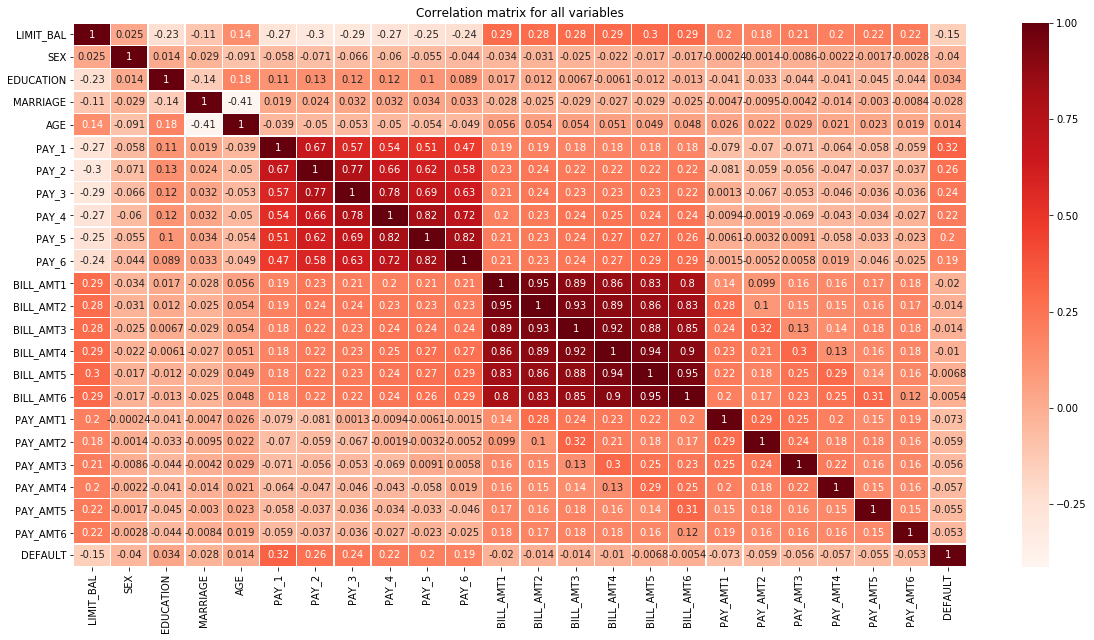

In [7]:
corrMatrix = df.iloc[:,1:].corr()

fig, ax = plt.subplots(figsize =(20,10))
sns.heatmap(corrMatrix, linewidths = 0.5,ax = ax, annot = True, cmap = 'Reds')
plt.title('Correlation matrix for all variables')
plt.show();

#### Observations:

1. In case of Limit_bal(credit limit), there is positive correlation only with one categorical variable which is age.
2. Among categorical variables, sex and education show very low values of positive correlation, also education and age show positive correlation.
3. High correlation between pay1 to pay6 with pay1 being the highest, bill amount1 to bill amount6 whereas correlation between bill amount and pay amount is comparitively low.

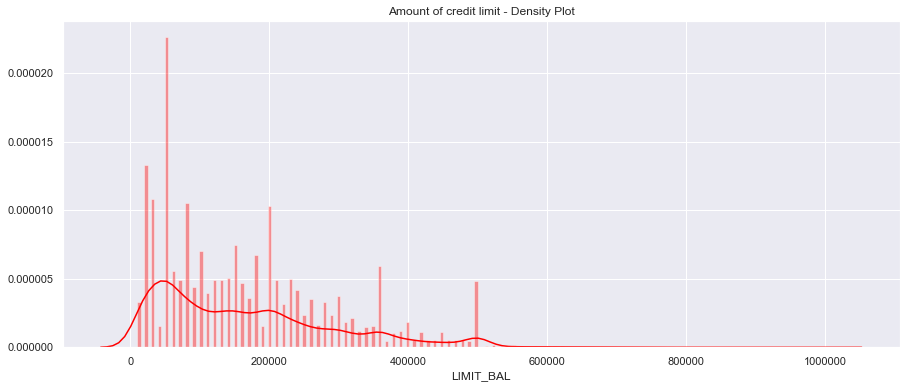

In [12]:
#Density plot for credit limit

sns.set(rc={'figure.figsize':(15,6)})
plt.title('Amount of credit limit - Density Plot')
sns.distplot(df['LIMIT_BAL'], kde = True, bins = 200, color = 'Red')
plt.show();

In [13]:
df['LIMIT_BAL'].value_counts().head(5)

50000     3365
20000     1976
30000     1610
80000     1567
200000    1528
Name: LIMIT_BAL, dtype: int64

Credit Limit of around 50,000 has maximum counts. This was verified by checking the count and 50K has the highest count-3365.

Next step, check variation of credit limit with age since it showed positive correlation. Since age is distributed from 21 - 79 yrs, we divide it into categories of 10 for the ease of analysis.

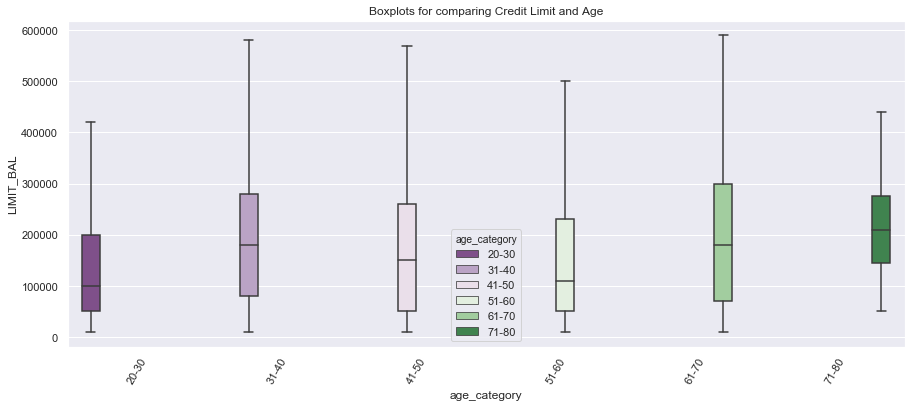

In [8]:
#age into categories

df['age_category'] = pd.cut(x=df['AGE'], 
                            bins=[20, 30, 40, 50, 60, 70, 80], 
                            labels=['20-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

#visualize age category and credit limit

sns.set(rc={'figure.figsize':(15,6)})
s = sns.boxplot(x = 'age_category', 
                y = 'LIMIT_BAL', 
                hue = 'age_category',
                data = df, 
                palette = "PRGn", 
                showfliers = False)
plt.title('Boxplots for comparing Credit Limit and Age')
s.set_xticklabels(s.get_xticklabels(),rotation = 60)
plt.show();

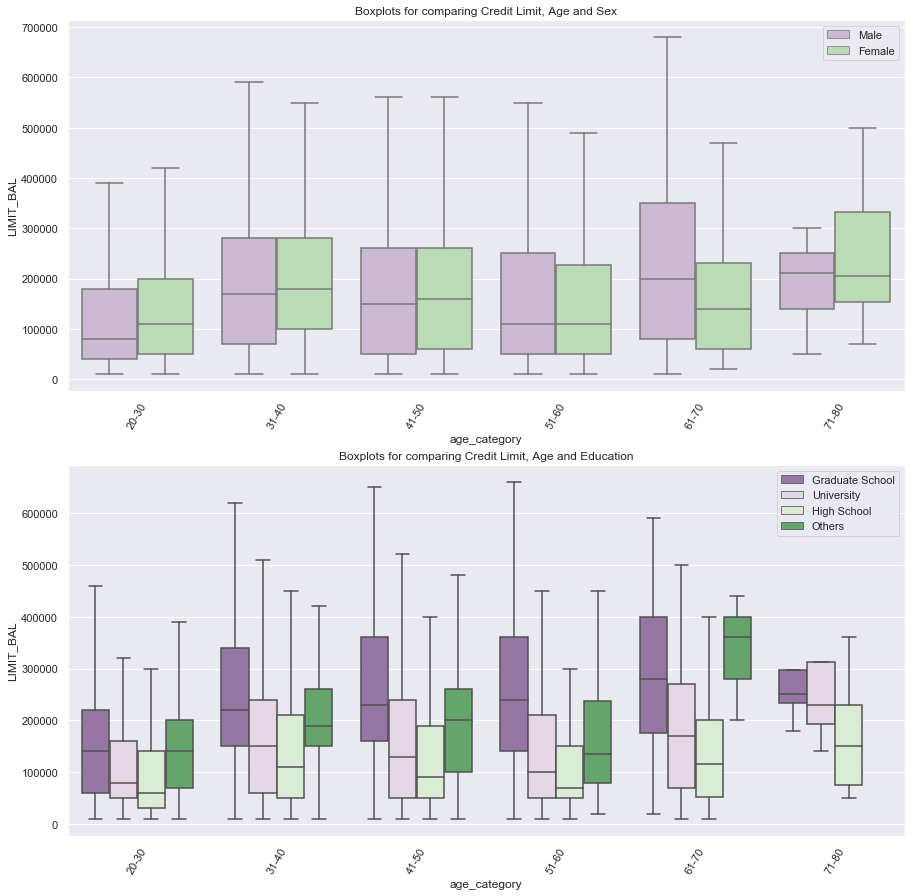

In [9]:
#credit limit with age category and sex

sns.set(rc={'figure.figsize':(15,15)})
fig, (ax1, ax2) = plt.subplots(nrows = 2)
s1 = sns.boxplot(x = 'age_category', 
                y = 'LIMIT_BAL', 
                hue = 'SEX',
                data = df, 
                ax = ax1,
                palette = "PRGn", 
                showfliers = False)
s1.set_title('Boxplots for comparing Credit Limit, Age and Sex')
s1.set_xticklabels(s.get_xticklabels(),rotation = 60)
handles, _ = s1.get_legend_handles_labels()
s1.legend(handles, ["Male", "Female"])


s2 = sns.boxplot(x = 'age_category', 
                y = 'LIMIT_BAL', 
                hue = 'EDUCATION',
                data = df, 
                ax = ax2,
                palette = "PRGn", 
                showfliers = False)
s2.set_title('Boxplots for comparing Credit Limit, Age and Education')
s2.set_xticklabels(s.get_xticklabels(),rotation = 60)
handles, _ = s2.get_legend_handles_labels()
s2.legend(handles, ["Graduate School", "University", "High School", "Others"])
plt.show();

Explore each of the categorical variables with 'DEFAULT'.

In [16]:
#Count of defaulters and non defaulters

df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

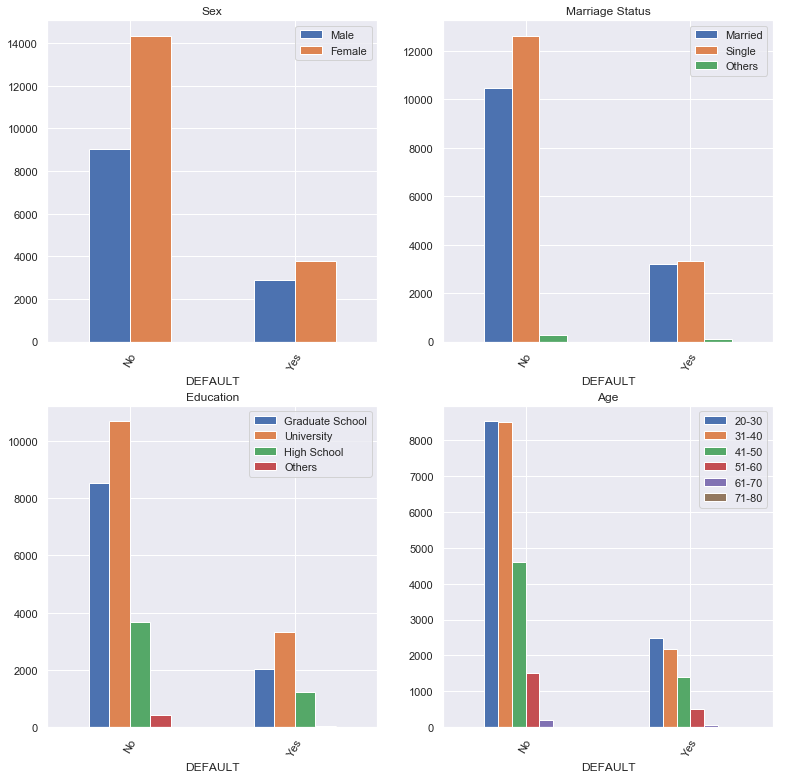

In [17]:

sns.set(rc={'figure.figsize':(13,13)})
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

#plot of defaulters v/s non defaulters based on sex

# fig, ax = subplots()
group = df.groupby(['DEFAULT', 'SEX']).size()
group.unstack().plot.bar(ax = ax1)
ax1.legend(["Male", "Female"]);
ax1.set_title('Sex')
ax1.set_xticklabels(["No", "Yes"], rotation = 60)



#plot of defaulters v/s non defaulters based on marital status

# fig, ax = subplots()
group = df.groupby(['DEFAULT', 'MARRIAGE']).size()
group.unstack().plot.bar(ax=ax2)
ax2.legend(["Married", "Single", "Others"]);
ax2.set_title('Marriage Status')
ax2.set_xticklabels(["No", "Yes"], rotation = 60)



#plot of defaulters v/s non-defaulters based on education

# fig, ax = subplots()
group = df.groupby(['DEFAULT', 'EDUCATION']).size()
group.unstack().plot.bar(ax=ax3)
ax3.set_title('Education')
ax3.legend(["Graduate School", "University", "High School", "Others"]);
ax3.set_xticklabels(["No", "Yes"], rotation = 60)



#plot of defaulters v/s non-defaulters for age categories

# fig, ax = subplots()
group = df.groupby(['DEFAULT', 'age_category']).size()
group.unstack().plot.bar(ax=ax4)
ax4.legend();
ax4.set_xticklabels(["No", "Yes"], rotation = 60)
ax4.set_title('Age')
plt.show();

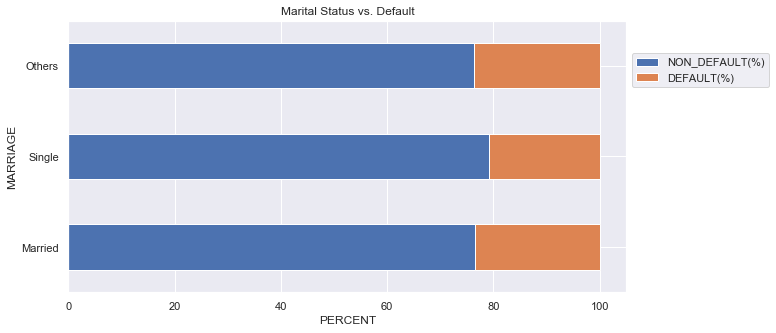

In [26]:
default0 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 0]).size().reset_index(name='NON_DEFAULT')
default1 = df.groupby(df['MARRIAGE'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('MARRIAGE').size().reset_index(name='TOTAL')

marriTable = default0.join(default1['DEFAULT']).join(total['TOTAL'])
marriTable['MARRIAGE'] = ['Married','Single','Others']

marriTable['NON_DEFAULT'] = round((default0['NON_DEFAULT']/total['TOTAL'])*100,2)
marriTable['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

marriPct = marriTable.iloc[:,0:3]
marriPct = marriPct.rename(columns={'NON_DEFAULT': 'NON_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})



In [ ]:
ax = marriPct.plot(x='MARRIAGE', kind='barh', stacked=True, title='Marital Status vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show();

#### Credit Behaviors

PAY_1 has highest value of positive correlation among all the PAY_i varaiables. 

So, explore the variations of PAY_1 considering:
* -2 corresponds to No consumption
* -1 corresponds to Paid in full
* 0 corresponds to Use of revolving credit (paid minimum only)
* 1 corresponds to Payment delay for one month
* 2 corresponds to Payment delay for two months.....
* 9 corresponding to payment delay for 9 months and above



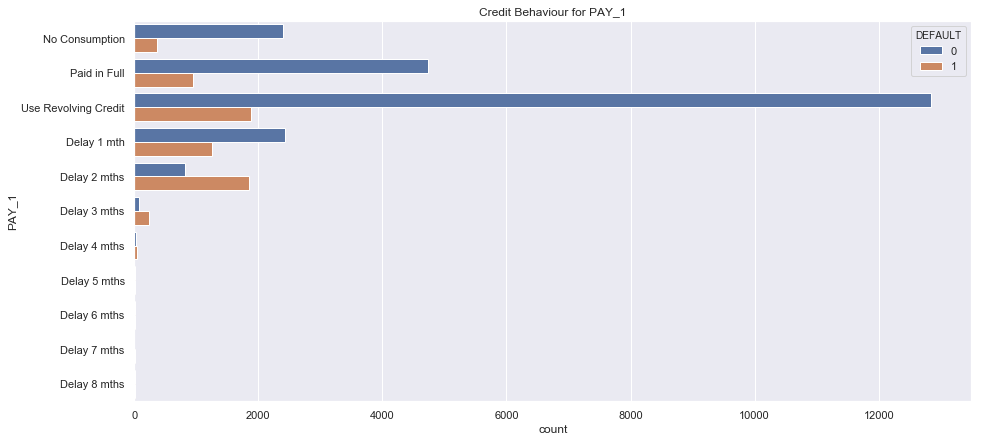

In [18]:
#plt.figure(figsize = (15,5))
sns.set(rc={'figure.figsize':(15,7)})

pay1 = sns.countplot(y="PAY_1", hue='DEFAULT', data=df)
pay1.set_yticklabels(['No Consumption','Paid in Full','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths'])
pay1.set_title('Credit Behaviour for PAY_1')
plt.show();

In [19]:
default0 = df.groupby(df['PAY_1'][df['DEFAULT'] == 0]).size().reset_index(name='NON_DEFAULT')
default1 = df.groupby(df['PAY_1'][df['DEFAULT'] == 1]).size().reset_index(name='DEFAULT')
total = df.groupby('PAY_1').size().reset_index(name='TOTAL')

pay1Table = default0.join(default1['DEFAULT']).join(total['TOTAL'])
pay1Table['PAY_1'] = ['No Consumption','Paid Duly','Use Revolving Credit','Delay 1 mth','Delay 2 mths'
                     ,'Delay 3 mths','Delay 4 mths','Delay 5 mths','Delay 6 mths','Delay 7 mths','Delay 8 mths']

pay1Table['NON_DEFAULT'] = round((default0['NON_DEFAULT']/total['TOTAL'])*100,2)
pay1Table['DEFAULT'] = round((default1['DEFAULT']/total['TOTAL'])*100,2)

pay1Pct = pay1Table.iloc[:,0:3]
pay1Pct = pay1Pct.rename(columns={'NON_DEFAULT': 'NON_DEFAULT(%)', 'DEFAULT': 'DEFAULT(%)'})
pay1Pct


,PAY_1,NON_DEFAULT(%),DEFAULT(%)
0,No Consumption,86.77,13.23
1,Paid Duly,83.22,16.78
2,Use Revolving Credit,87.19,12.81
3,Delay 1 mth,66.05,33.95
4,Delay 2 mths,30.86,69.14
5,Delay 3 mths,24.22,75.78
6,Delay 4 mths,31.58,68.42
7,Delay 5 mths,50.00,50.00
8,Delay 6 mths,45.45,54.55
9,Delay 7 mths,22.22,77.78


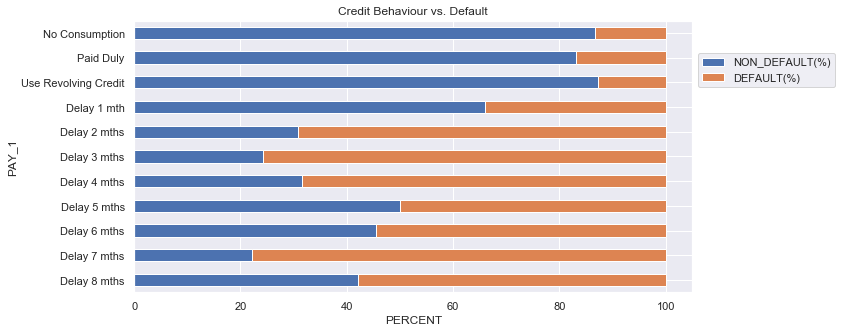

In [20]:
sns.set(rc={'figure.figsize':(10,5)})
ax = pay1Pct.sort_index(ascending=False).plot(x='PAY_1', kind='barh', stacked=True, title='Credit Behaviour vs. Default')
ax.set_xlabel('PERCENT')
ax.get_legend().set_bbox_to_anchor((1, 0.9))
plt.show();
